# **Project Name : ✨ Fake News Detection Analysis ✨**

AUTHOR : **Jamshed Butt** from **Data Science**

# **Dataset Description**

**train.csv:** A full training dataset with the following

**attributes:**

**id:** unique id for a news article

**title:** the title of a news article

**author:** author of the news article

**text:** the text of the article; could be incomplete

**label:** a label that marks the article as potentially unreliable
1: unreliable
0: reliable

# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc

# **Load Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Fake News Detection/train.csv.zip")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.shape

(20800, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# **Data Preprocessing**

#### **Remove Duplicate**

In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())

0


#### **Check and Remove NaN Values**

In [ ]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

#### **Preprocess Data**

In [ ]:
def preprocessing_text(text):
  text = text.lower()
  text = re.sub(r"[^\s\w]","",text)
  return text

In [ ]:
df['preprocessed_text'] = df['text'].apply(preprocessing_text)

#### **Remove Unuse Columns**

In [ ]:
X = df["preprocessed_text"]
Y = df["label"]

In [ ]:
X

0        house dem aide we didnt even see comeys letter...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29 2...
3        videos 15 civilians killed in single us airstr...
4        print \nan iranian woman has been sentenced to...
                               ...                        
20795    rapper t i unloaded on black celebrities who m...
20796    when the green bay packers lost to the washing...
20797    the macys of today grew from the union of seve...
20798    nato russia to hold parallel exercises in balk...
20799      david swanson is an author activist journali...
Name: preprocessed_text, Length: 18285, dtype: object

#### **Feature Extraction**

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

In [ ]:
print("X : ",X.shape)

X :  (18285, 189470)


# **Spliting the Dataset**

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (12799, 189470)
train_label :  (12799,)
test_data :  (5486, 189470)
test_label :  (5486,)


# **Model**

#### **Logistic Regression**

In [ ]:
model_lr = LogisticRegression().fit(train_data,train_label)

In [ ]:
y_pred = model_lr.predict(test_data)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
model_lr.score(test_data,test_label)

0.949690120306234

In [ ]:
confusion_matrix(y_pred,test_label)

array([[2971,  163],
       [ 113, 2239]])

In [ ]:
print("Accuracy Score : ",accuracy_score(y_pred,test_label))

Accuracy Score :  0.949690120306234


In [ ]:
print(classification_report(y_pred,test_label))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3134
           1       0.93      0.95      0.94      2352

    accuracy                           0.95      5486
   macro avg       0.95      0.95      0.95      5486
weighted avg       0.95      0.95      0.95      5486



In [ ]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_lr,train_data,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_lr,test_data,test_label,cv=5).mean())

Corss _Val_Score Train Data :  0.9425734234564282
Corss _Val_Score Test Data :  0.9276330711511607


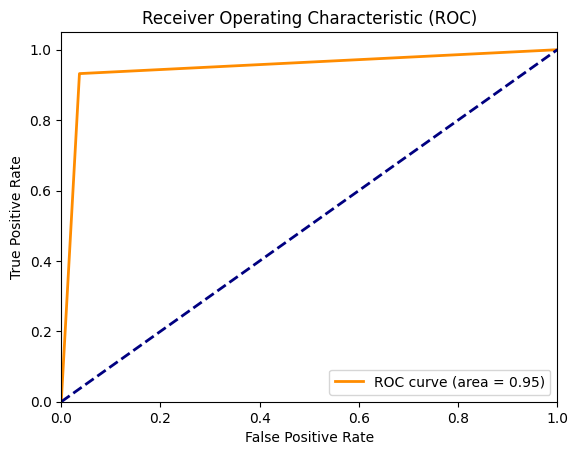

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(test_label, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### **Random Forest Model**

In [ ]:
model_rf = RandomForestClassifier().fit(train_data,train_label)

In [ ]:
y_pred_2 = model_rf.predict(test_data)

In [ ]:
y_pred_2

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print("Accuracy Score : ",accuracy_score(y_pred_2,test_label))

Accuracy Score :  0.8946409041195771


In [ ]:
confusion_matrix(y_pred_2,test_label)

array([[3007,  501],
       [  77, 1901]])

In [ ]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      3508
           1       0.79      0.96      0.87      1978

    accuracy                           0.89      5486
   macro avg       0.88      0.91      0.89      5486
weighted avg       0.91      0.89      0.90      5486



In [ ]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_rf,train_data,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_rf,test_data,test_label,cv=5).mean())

Corss _Val_Score Train Data :  0.8897576873290347
Corss _Val_Score Test Data :  0.8716755250700287


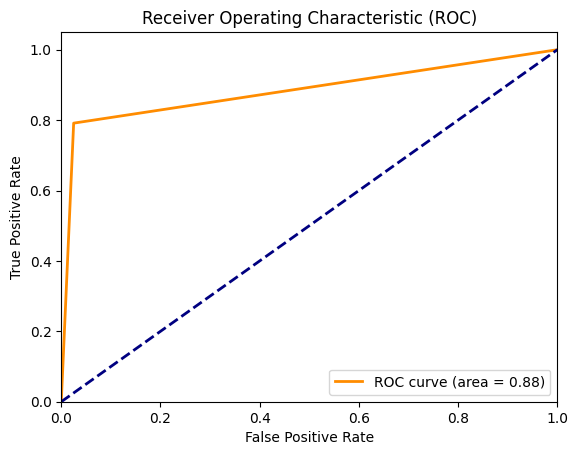

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(test_label, y_pred_2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()